# TP1 Deep Learning : 
> Ce TP est effectué par :
**Sandra Mourali**- **Anas Chaibi** - **Salma Ghabri** - **Aziz Bellaaj** - **Louay Badri**
---

## Exercice 1 : Perceptron mono-couche

### Overview :

* The `make_blobs()` function can be used to generate blobs of points (dataset generally for classification problems)  with a Gaussian distribution for clustering. 
* The param cluster_std is the `standard deviation` of the clusters. 
* The standard deviation is a statistic that tells you **how tightly data are clustered around the mean**. 
* When the sizes are tightly clustered a => the standard deviation is small.

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

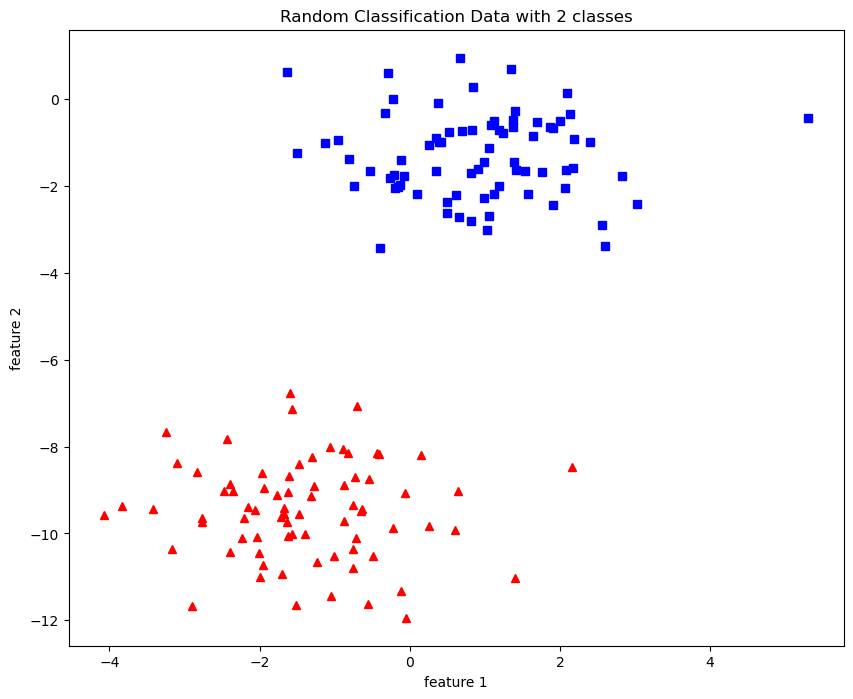

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# The example below generates a 2D dataset of samples with two blobs as a binary classification prediction problem
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
# random_state int to make sure that the same dataset is created in any computer
# Plotting
fig = plt.figure(figsize=(10, 8))  # initializer la figure dont (axe x ,axe y)
plt.plot(
    X[:, 0][y == 0], X[:, 1][y == 0], "r^"
)  # prendre tous les points de X (les cordonnées 2D) dont y==0(classe 0) et la colorer en rouge
plt.plot(
    X[:, 0][y == 1], X[:, 1][y == 1], "bs"
)  # prendre tous les points de X (les cordonnées 2D) dont y==1(classe 1) et la colorer en bleu
plt.xlabel("feature 1")  # donner descreption au axe x
plt.ylabel("feature 2")  # donner descreption au axe y
plt.title("Random Classification Data with 2 classes")  # donner un titre au figure

> cluster_std
le 'cluster_std' est un paramétre statistique qui donne une idée comment les points sont générés autour le moyenne du cluster
* On augumente cluster_std => les deux datasets se chevauchent et il sera difficile de les classifier.
* On diminue cluster_std => elles sont plus loin(externe) et tous les points proches autour de centre(interne) .

Text(0.5, 1.0, 'std=0.05')

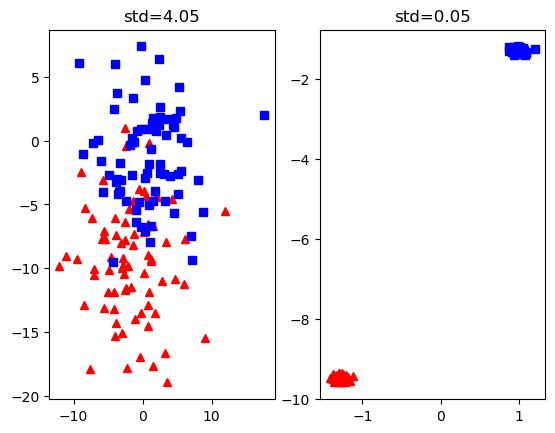

In [2]:
plt.subplot(1, 2, 1)
a, b = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=4.05, random_state=2
)
plt.plot(a[:, 0][b == 0], a[:, 1][b == 0], "r^")
plt.plot(a[:, 0][b == 1], a[:, 1][b == 1], "bs")
plt.title("std=4.05")

plt.subplot(1, 2, 2)
c, d = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=0.05, random_state=2
)
plt.plot(c[:, 0][d == 0], c[:, 1][d == 0], "r^")
plt.plot(c[:, 0][d == 1], c[:, 1][d == 1], "bs")
plt.title("std=0.05")

In [3]:
X.shape

(150, 2)

### Implémentation du perceptron :

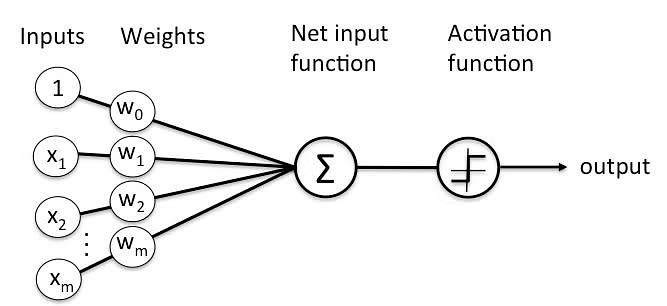

In [4]:
def acti_func(z):
    if z > 0:
        return 1.0  # on retourne un float
    else:
        return 0

* X --> Inputs.
* y --> labels/target.
* lr --> learning rate.
* epochs --> Number of iterations.
* m-> number of training examples
* n-> number of features

In [5]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    # w = np.zeros((n+1,1))
    # Pratiquement il faut que L'initialisation des weights w0,w1,w2 soient différents et random car l'algorithme de Gradient Descent va les traiter identiquement(dans le cas tous 0) e
    # et ceci peut causer la faiblesse des prédictions
    w = np.random.rand(3, 1) * 1e-4
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            # np.insert() va insérer la valeur (3éme argument ) dans l'axe et l'indexe speicifiés (on va faire des simples exemples dans les cellueles suivantes)
            x_i = np.insert(x_i, 0, 1).reshape(
                -1, 1
            )  # reshape(-1,1) removes all 1 dimensions  (on va faire des simples exemples dans les cellueles suivantes)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr * (y[idx] - y_hat) * x_i
                n_miss += 1
            # Incrementing by 1.
            # Appending number of misclassified examples
            # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list
    # variable to store #misclassified.

##### Numpy `np.squeeze` et `np.insert` :

In [6]:
a = np.zeros((3, 1, 8, 1))
print(
    f"les dimensions de a {a.shape} et les dimensions de a aprés squeeze {np.squeeze(a).shape}"
)

les dimensions de a (3, 1, 8, 1) et les dimensions de a aprés squeeze (3, 8)


In [7]:
a = np.zeros((3, 1))
print(a)
print(f"insérer 1 dans l indexe 0 {np.insert(a, 0, 1)}")

[[0.]
 [0.]
 [0.]]
insérer 1 dans l indexe 0 [1. 0. 0. 0.]


#### Problème d'initialisation de weights :

* Si on initialise les weights en zéros, l'algorithme de gradient descent va les traiter identiquement donc tous les hidden layers vont avoir les memes valeurs (car memes dérivés)
* Il faut donc les initialiser différemment.

In [8]:
w, _ = perceptron(X, y, 0.000001, 50)
# '_' signifie qu'on ignore la 2éme valeur retournée n_miss_list puisqu'on n'a pas besoin de la stocker pour le moment
w

array([[7.60748013e-05],
       [2.71803453e-05],
       [1.75574825e-05]])

#### Decision Boundary :

* X --> Inputs
* w --> parameters
* The Line is y=mx+c
* So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
* Solving we find : `x2 = m*x1 + c`

In [9]:
def plot_decision_boundary(X, w):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1] / w[2]
    c = -w[0] / w[2]
    x2 = m * x1 + c
    # Plotting

    plt.plot(
        x1, x2, "g", label="decision boundary"
    )  # tracer le ligne de décision(séparation entre les deux clusters en vert)

Text(0.5, 1.0, 'Decision boundary of 2 classes')

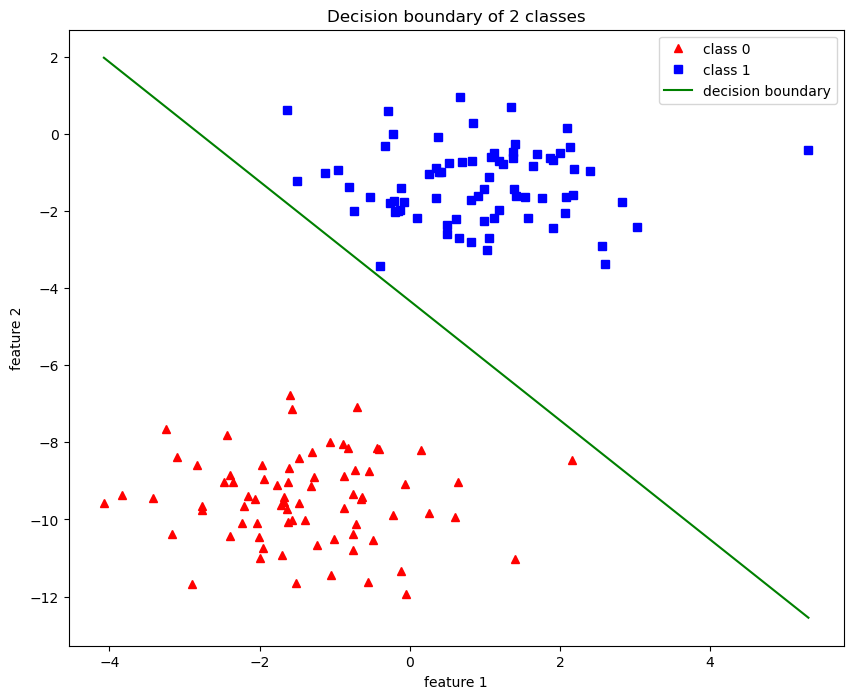

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "r^", label="class 0")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="class 1")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X, w)
plt.legend()
plt.title("Decision boundary of 2 classes")

### Exercice 2 : 

* 𝑆={(𝑥,𝑦)}𝑖=1250 composé de 250 points xi = (x1, x2) et leur classes yi. 
* Les premières 125 xi sont classées yi = −1 et sont générées selon une distribution gaussienne 𝑥𝑖∼𝑁(𝜇1,σ12), où 𝜇1=[−1,0]
* Les dernières 125 xi sont classées yi = 0 et sont générées selon une distribution gaussienne 𝑥𝑖∼𝑁(𝜇2,σ22), où 𝜇1=[1,0]

In [11]:
def make_normal_data(m1, m2, s1, s2):

    y = np.array([])
    for i in range(250):
        if i < 125:
            y = np.append(y, 1)
        else:
            y = np.append(y, 0)
    # on fait deux distribution gausiennes chaqune composée 125 ligne et 2 colonnes
    normal_1 = np.random.normal(m1, s1, size=(125, 2))
    normal_2 = np.random.normal(m2, s1, size=(125, 2))
    normal_X = np.concatenate((normal_1, normal_2), axis=0)

    train_normal_data, test_normal_data, train_labels, test_labels = train_test_split(
        normal_X, y, test_size=0.2, random_state=42
    )

    return (normal_X, y, train_normal_data, test_normal_data, train_labels, test_labels)

#### Implémenter l’algorithme de perceptron
* Weights initialisés random (non zéros) par la méthode np.random.rand
* La fonction predict va prédire la classe selon l'algotihme de Perceptron



In [12]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.

    w = np.random.rand(3, 1) * 1e-2
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            # np.insert() va insérer la valeur (3éme argument ) dans l'axe et l'indexe speicifiés (on va faire des simples exemples dans les cellueles suivantes)
            x_i = np.insert(x_i, 0, 1).reshape(
                -1, 1
            )  # reshape(-1,1) removes all 1 dimensions  (on va faire des simples exemples dans les cellueles suivantes)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr * (y[idx] - y_hat) * x_i
                n_miss += 1
            # Incrementing by 1.
            # Appending number of misclassified examples
            # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list
    # variable to store #misclassified.

#### Predict Function :
* Donner les features X et les weights de Perceptron et retourner les classes predicted
> On fait la somme et on la passe au activation function

In [13]:
def predict(X, w):
    m, n = X.shape
    predicted_labels = []
    for idx, x_i in enumerate(X):
        # Insering 1 for bias, X0 = 1.
        x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
        # Calculating prediction/hypothesis.
        y_hat = acti_func(np.dot(x_i.T, w))
        predicted_labels.append(y_hat)
    return predicted_labels

#### 2. Expérience 1 : Générer un dataset pour σ12=σ22=0.25

In [14]:
(
    _,
    _,
    train_normal_data_exp1,
    test_normal_data_exp1,
    train_labels_exp1,
    test_labels_exp1,
) = make_normal_data((-1, 0), (1, 0), 0.25, 0.25)

In [15]:
train_normal_data_exp1[:10], train_labels_exp1[
    :10
], train_normal_data_exp1.shape, test_normal_data_exp1.shape
# visualize the first 10 of the gaussian distribution and the labels(shiffled)

(array([[ 8.81565959e-01,  1.23520114e-01],
        [ 1.07546523e+00,  5.23780024e-01],
        [ 1.50677608e+00, -4.36059840e-02],
        [-9.47044138e-01,  4.37349966e-01],
        [ 8.36987714e-01,  4.11702110e-01],
        [-7.78908815e-01,  4.84667583e-02],
        [ 1.05948242e+00,  4.02618640e-01],
        [ 1.01206565e+00, -1.86181620e-01],
        [ 7.23886374e-01,  3.79213752e-01],
        [ 1.29143115e+00,  1.90415893e-04]]),
 array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]),
 (200, 2),
 (50, 2))

In [16]:
# Exécuter Perceptron sur le training data
w_exp1, _ = perceptron(train_normal_data_exp1, train_labels_exp1, 0.1, 100)

Text(0.5, 1.0, 'Decision boundary of 2 classes')

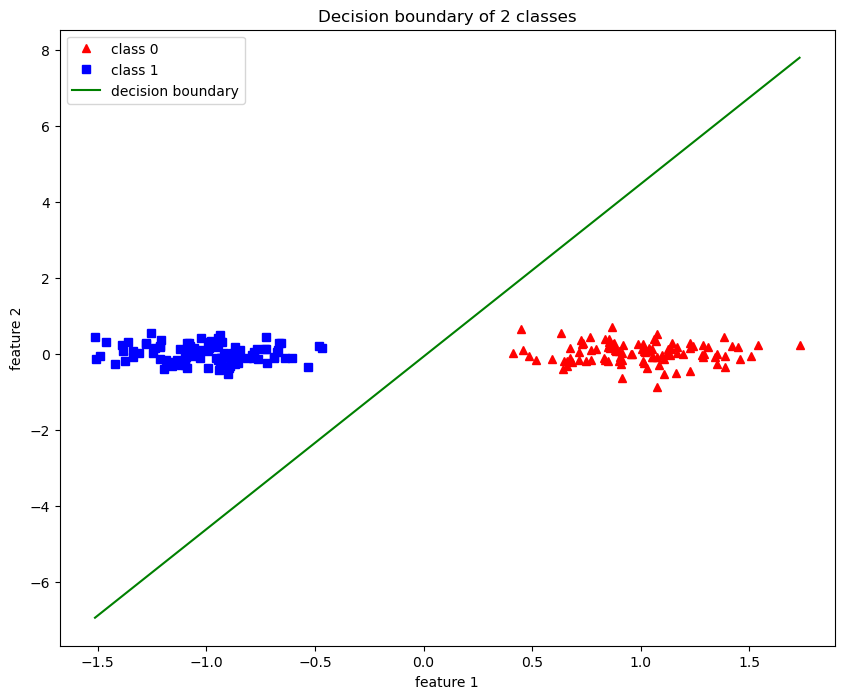

In [17]:
fig = plt.figure(figsize=(10, 8))
plt.plot(
    train_normal_data_exp1[:, 0][train_labels_exp1 == 0],
    train_normal_data_exp1[:, 1][train_labels_exp1 == 0],
    "r^",
    label="class 0",
)
plt.plot(
    train_normal_data_exp1[:, 0][train_labels_exp1 == 1],
    train_normal_data_exp1[:, 1][train_labels_exp1 == 1],
    "bs",
    label="class 1 ",
)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(train_normal_data_exp1, w_exp1)
plt.legend()
plt.title("Decision boundary of 2 classes")

#### Interprétation Expérience 1

> L'algorithme converge-t-il ? Pourquoi ?

* L'algorithme converge car il sépare les deux clusters grace au sigma petite=0.25 qui génére une bonne dataset

> Tracez la limite de décision trouvée par votre algorithme. Cette limite de décision est-elle unique ? La modification de l'initialisation modifie-t-elle le résultat de l'algorithme ?

* Non, cette décision n'est pas unique. Elle dépend de l'initialisation des weights,nombre d'epochs et la valeur de learning rate

c. Calculer la justesse (accuracy) de la classification sur l'ensemble de test. Tracez la limite de décision sur l'ensemble de test

In [18]:
predicted_exp1 = predict(test_normal_data_exp1, w_exp1)
score = accuracy_score(predicted_exp1, test_labels_exp1)
print(f"accuracy =  {int(score*100)} %")

accuracy =  100 %


Text(0.5, 1.0, 'Decision boundary of 2 classes: Test Data')

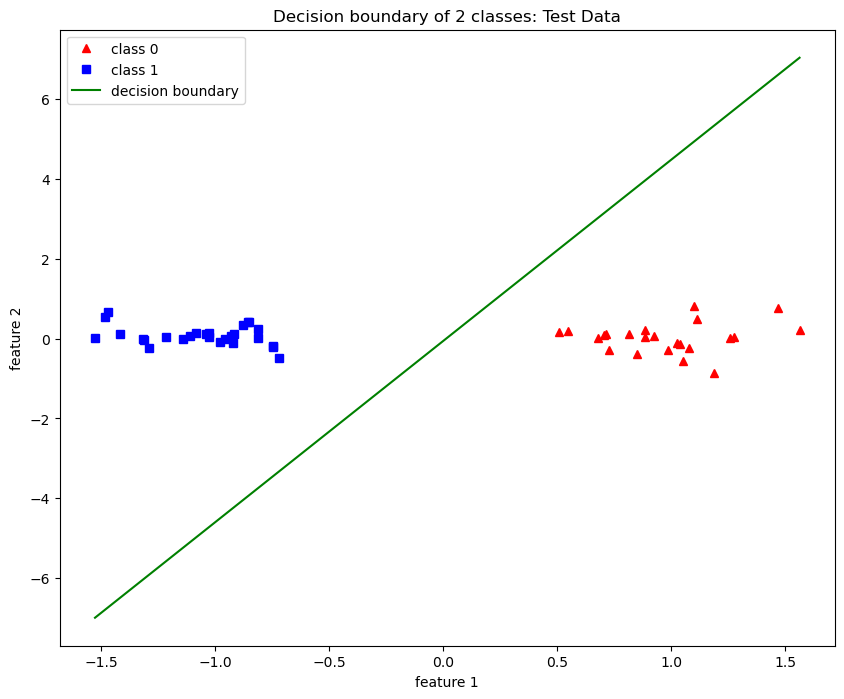

In [19]:
# tracer la limite de décision sur l'ensemble de test
fig = plt.figure(figsize=(10, 8))
plt.plot(
    test_normal_data_exp1[:, 0][test_labels_exp1 == 0],
    test_normal_data_exp1[:, 1][test_labels_exp1 == 0],
    "r^",
    label="class 0",
)
plt.plot(
    test_normal_data_exp1[:, 0][test_labels_exp1 == 1],
    test_normal_data_exp1[:, 1][test_labels_exp1 == 1],
    "bs",
    label="class 1",
)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(test_normal_data_exp1, w_exp1)
plt.legend()
plt.title("Decision boundary of 2 classes: Test Data")

#### 3. Expérience 2 : Générer un dataset pour σ12=σ22=0.75

In [20]:
(
    _,
    _,
    train_normal_data_exp2,
    test_normal_data_exp2,
    train_labels_exp2,
    test_labels_exp2,
) = make_normal_data((-1, 0), (1, 0), 0.75, 0.75)

In [21]:
# Exécuter Perceptron sur le training data
w_exp2, _ = perceptron(train_normal_data_exp2, train_labels_exp2, 0.1, 100)

Text(0.5, 1.0, 'Decision boundary of 2 classes')

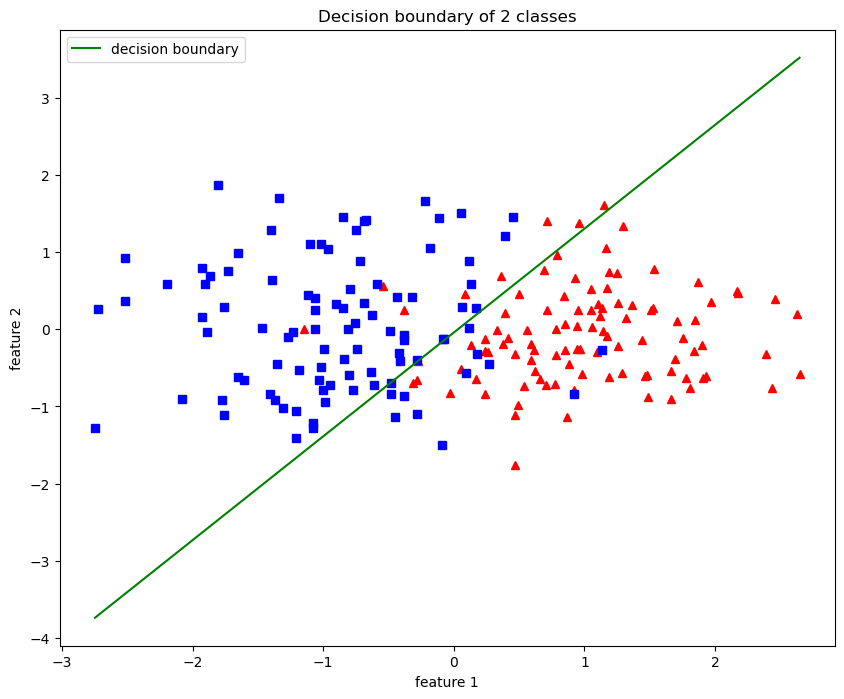

In [22]:
fig = plt.figure(figsize=(10, 8))
plt.plot(
    train_normal_data_exp2[:, 0][train_labels_exp2 == 0],
    train_normal_data_exp2[:, 1][train_labels_exp2 == 0],
    "r^",
)
plt.plot(
    train_normal_data_exp2[:, 0][train_labels_exp2 == 1],
    train_normal_data_exp2[:, 1][train_labels_exp1 == 1],
    "bs",
)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(train_normal_data_exp2, w_exp2)
plt.legend()
plt.title("Decision boundary of 2 classes")

#### Interpétation Expérience 2 :

> L'algorithme converge-t-il ? Pourquoi ?

* Non,l'algorithme ne converge pas (malgré il semble qu'il fait une bonne classification selon la distribution dataset)

> Tracez la limite de décision trouvée par votre algorithme. Cette limite de décision est-elle unique ? La modification de l'initialisation modifie-t-elle le résultat de l'algorithme ?

* Non, cette décision n'est pas unique. Elle dépend de l'initialisation des weights,nombre d'epochs et la valeur de learning rate

In [23]:
predicted_exp2 = predict(test_normal_data_exp2, w_exp2)
score = accuracy_score(predicted_exp2, test_labels_exp2)
print(f"accuracy =  {int(score*100)} %")

accuracy =  86 %


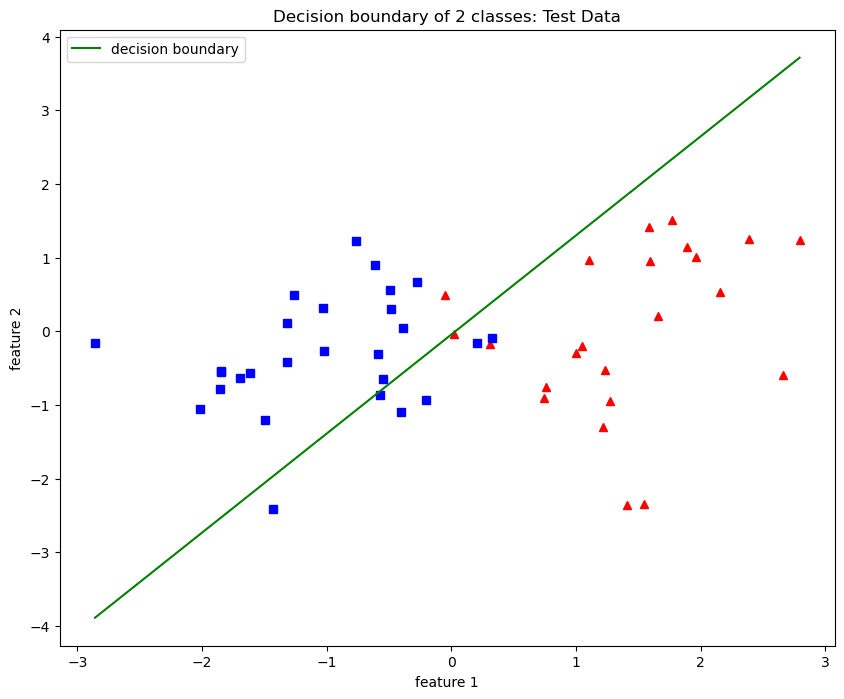

In [24]:
# tracer la limite de décision sur l'ensemble de test
fig = plt.figure(figsize=(10, 8))
plt.plot(
    test_normal_data_exp2[:, 0][test_labels_exp2 == 0],
    test_normal_data_exp2[:, 1][test_labels_exp2 == 0],
    "r^",
)
plt.plot(
    test_normal_data_exp2[:, 0][test_labels_exp2 == 1],
    test_normal_data_exp2[:, 1][test_labels_exp2 == 1],
    "bs",
)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(test_normal_data_exp2, w_exp2)
plt.title("Decision boundary of 2 classes: Test Data")
plt.legend()

#### Expérience 3 : 

* Générez les données et entraînez votre modèle.
* Calculez l'erreur sur l'ensemble de test.
Afin d'étudier l'impact de la variation de σ2 1et σ22 sur les performances du système:
* Nous stockons l'erreur sur plusieurs expériences (prendre nb expérience = 30). 
* Puis on calcule la moyenne et la variance des erreurs stockées. Pour chaque σ1 2et σ22 ∈ [0.01, 0.1, 0.5, 0.7]
calculez la moyenne et la variance puis tracez les résultats en utilisant matplotlib.pyplot.errorbar

In [25]:
def ensemble_perceptron(
    n_experiences,
    s1,
    s2,
):
    test_errors = []  # stocker les valeurs des erreurs
    for i in range(n_experiences):
        # pour chaque fois, on fait comme exp1 et 2: cad on génére la distribution gaussienne puis on calcule les weights de perceptron, on fait notre predictions et on
        # calcule l'erreurs sur l'ensemble de test et on les stocke.
        _, _, train_normal_data, test_normal_data, train_labels, test_labels = (
            make_normal_data((-1, 0), (1, 0), s1, s2)
        )  # generate gaussian dataset 30
        w, _ = perceptron(train_normal_data, train_labels, 0.1, 100)
        predicted = predict(test_normal_data, w)
        test_errors.append(1 - accuracy_score(predicted, test_labels))
    mean_error = np.mean(
        test_errors
    )  # calculer la moyenne des erreurs (30 valeurs -> 1 valeur)
    std_error = np.std(test_errors)  # calculer la std des erreurs
    return mean_error, std_error

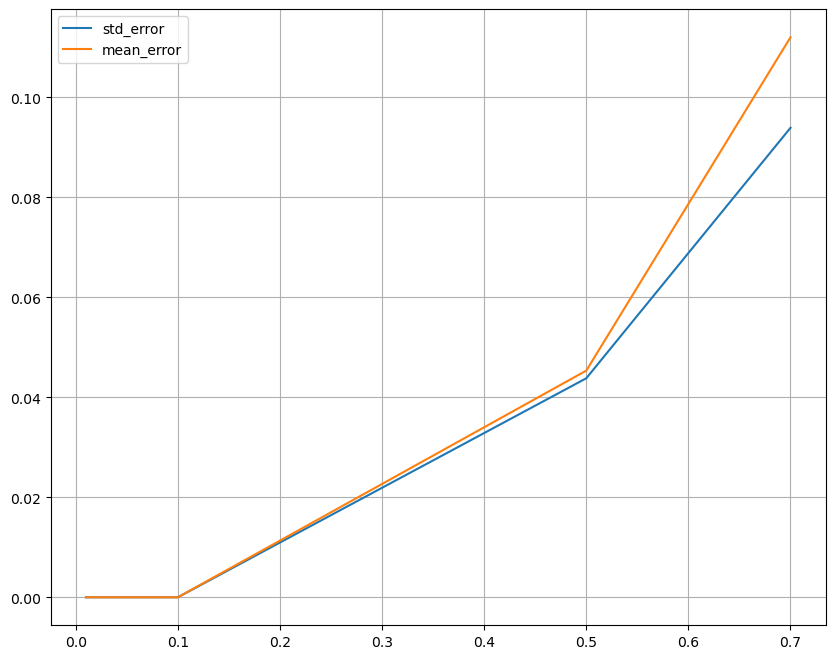

In [26]:
mean_errors = []
std_errors = []
fig = plt.figure(figsize=(10, 8))
for sigmas in [0.01, 0.1, 0.5, 0.7]:
    error, std = ensemble_perceptron(30, sigmas, sigmas)
    mean_errors.append(error)
    std_errors.append(std)
plt.grid()
plt.errorbar([0.01, 0.1, 0.5, 0.7], std_errors, label="std_error")
plt.errorbar([0.01, 0.1, 0.5, 0.7], mean_errors, label="mean_error")
plt.legend()

In [27]:
len(std_errors), len(mean_errors)

(4, 4)

In [28]:
std_errors, mean_errors

([0.0, 0.0, 0.04379751388175157, 0.09389355675444401],
 [0.0, 0.0, 0.04533333333333336, 0.11200000000000003])

#### Interprétation Expérience 4 :

* Sigma a un grand effet sur l'accuracy de la classification.
* Quand sigma augumente l'erreur augumente de vitesse variable et ceci est justifié par le role de standard deviation qui controle les variances des clusters(comme on a choisi une grande valeur de std et une petite valeur au dessus).
* On doit chercher à minimiser l'erreur selon sigma pour que l'algorithme de Perceptron soit optimal.